In [1]:
suppressMessages(library(ArchR))
ss <- function(x, pattern, slot = 1, ...) { sapply(strsplit(x = x, split = pattern, ...), '[', slot) }
options(stringsAsFactors = F)
options(repr.plot.width=11, repr.plot.height=8.5)

In [2]:
##################################
### set Arrow File parameters ####
addArchRThreads(threads = 4)

##################################
### load rheMac10 ArchR genome ###
GENOMEDIR='/home/bnphan/resources/genomes/rn7'
load(file.path(GENOMEDIR,'rn7_liftoff_mm10NcbiRefSeq_ArchR_annotations.rda'))

Setting default number of Parallel threads to 4.



In [3]:
PROJDIR='/projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/ArchRProjects'
ARCHDIR=file.path(PROJDIR,'Rat_Transgen_NAc_scATAC')
proj = loadArchRProject(ARCHDIR)

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

# Make plots

In [8]:
names(getCellColData(proj))

[1] "Sample"            "TSSEnrichment"     "ReadsInTSS"       
 [4] "ReadsInPromoter"   "ReadsInBlacklist"  "PromoterRatio"    
 [7] "PassQC"            "NucleosomeRatio"   "nMultiFrags"      
[10] "nMonoFrags"        "nFrags"            "nDiFrags"         
[13] "DoubletScore"      "DoubletEnrichment" "BlacklistRatio"   
[16] "Sire"              "ClustersI200_ATAC"

In [4]:
varFeat = 200
pd = getCellColData(proj)
dimRed = names(attributes(proj)$reducedDims)
embedNames = names(attributes(proj)$embeddings)

iterLSIName = paste0("IterativeLSI",varFeat,'_ATAC')
print(iterLSIName)
if (iterLSIName %ni% dimRed){
  pdf()
  proj <- addIterativeLSI( proj, useMatrix = "TileMatrix", 
                           name = iterLSIName,
                           LSIMethod = 2, 
                           iterations = 4, # increase this if noticing subtle batch effects
                           scaleTo = 20000, # median unique fragment per cell
                           selectionMethod = 'var',
                           clusterParams = list( # See Seurat::FindClusters
                             resolution = .2, # lower this if noticing subtle batch effects
                             sampleCells = 10000,  n.start = 10), 
                           varFeatures = varFeat * 1000, # also can reduce this if noticing subtle batch effects
                           dimsToUse = 1:30, force = FALSE)
  dev.off()
  proj = saveArchRProject(ArchRProj = proj)}


[1] "IterativeLSI200_ATAC"


Checking Inputs...

ArchR logging to : ArchRLogs/ArchR-addIterativeLSI-b5846ef96d0a-Date-2022-11-11_Time-17-00-15.log
If there is an issue, please report to github with logFile!

2022-11-11 17:00:42 : Computing Total Across All Features, 0.271 mins elapsed.

2022-11-11 17:01:00 : Computing Top Features, 0.569 mins elapsed.

###########
2022-11-11 17:01:01 : Running LSI (1 of 4) on Top Features, 0.584 mins elapsed.
###########

2022-11-11 17:01:01 : Sampling Cells (N = 10002) for Estimated LSI, 0.585 mins elapsed.

2022-11-11 17:01:03 : Creating Sampled Partial Matrix, 0.616 mins elapsed.

2022-11-11 17:02:38 : Computing Estimated LSI (projectAll = FALSE), 2.201 mins elapsed.

2022-11-11 17:07:24 : Identifying Clusters, 6.965 mins elapsed.

2022-11-11 17:08:03 : Identified 6 Clusters, 7.628 mins elapsed.

2022-11-11 17:08:03 : Saving LSI Iteration, 7.629 mins elapsed.



2022-11-11 17:08:33 : Creating Cluster Matrix on the total Group Features, 8.129 mins elapsed.

2022-11-11 17:10:06 :

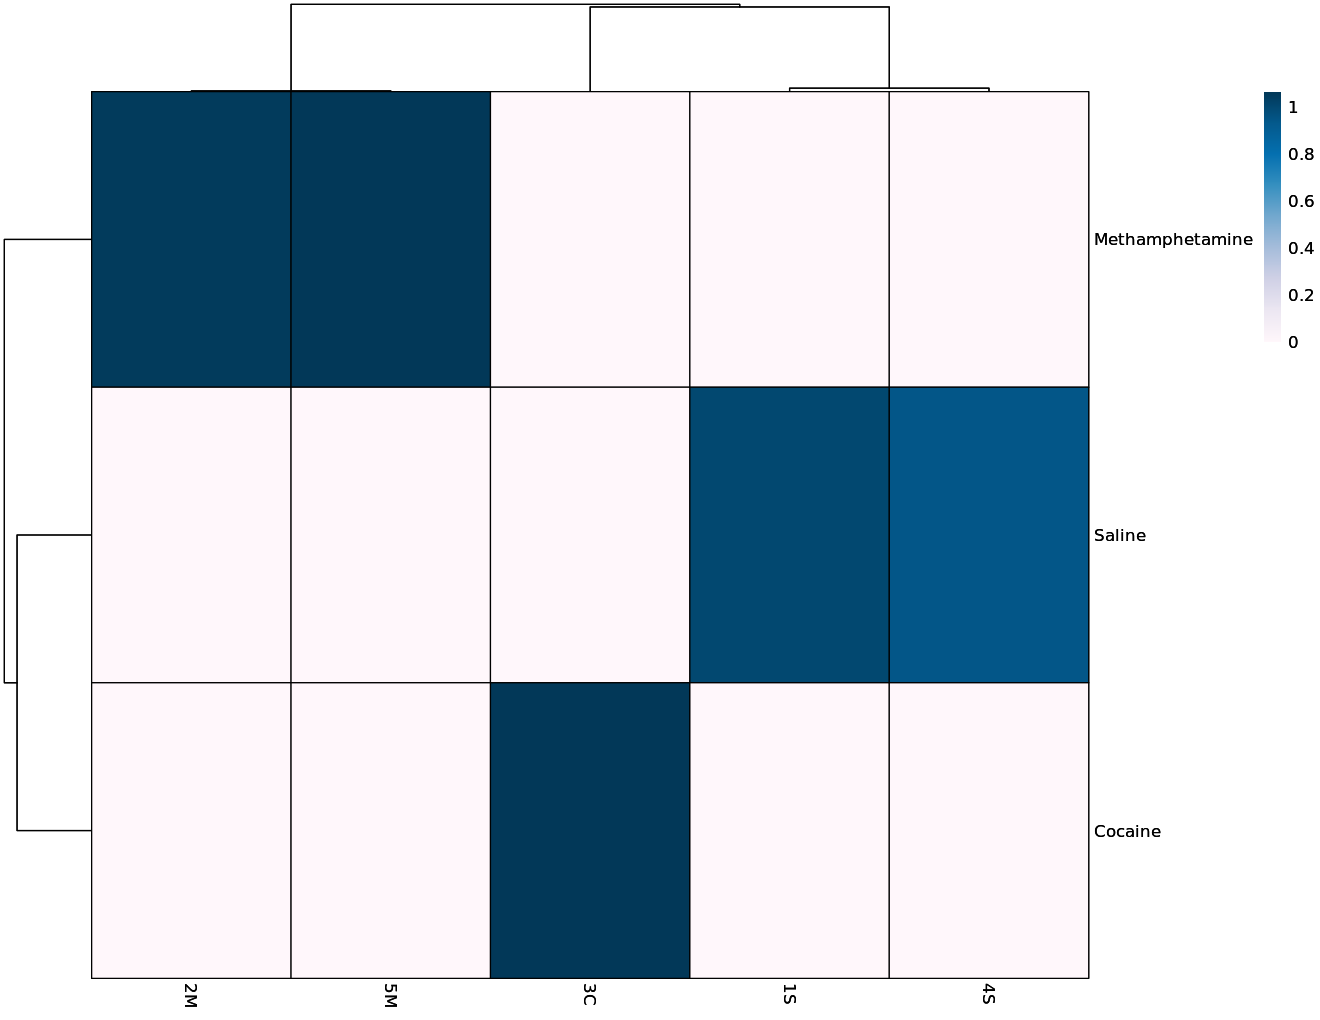

In [5]:
# plot the confusion matrix of cell types by subjects
cM <- confusionMatrix(paste0(proj$Sire), paste0(proj$Sample))
cM <- cM / Matrix::colSums(cM)
p <- pheatmap::pheatmap(
  mat = as.matrix(cM), 
  color = paletteContinuous("whiteBlue"), 
  border_color = "black")
p

In [5]:
UMAPName = paste0("UMAPI",varFeat,'_ATAC')
if (UMAPName %ni% embedNames){
  print(UMAPName)
  proj <- addUMAP(proj, reducedDims = iterLSIName, 
                  name = UMAPName, nNeighbors = 30, minDist = 0.5, 
                  metric = "cosine", force = F)}

[1] "UMAPI200_ATAC"


19:51:26 UMAP embedding parameters a = 0.583 b = 1.334

19:51:26 Read 44068 rows and found 30 numeric columns

19:51:26 Using Annoy for neighbor search, n_neighbors = 30

19:51:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:51:32 Writing NN index file to temp file /tmp/RtmpIzUadm/fileb584a68efd5

19:51:32 Searching Annoy index using 16 threads, search_k = 3000

19:51:44 Annoy recall = 100%

19:51:45 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 30

19:51:47 Initializing from normalized Laplacian + noise (using irlba)

19:51:50 Commencing optimization for 200 epochs, with 2185926 positive edges

19:53:07 Optimization finished

19:53:07 Creating temp model dir /tmp/RtmpIzUadm/dirb584631f58c9

19:53:07 Creating dir /tmp/Rtmp

In [6]:
# add clusters
ClustersName = paste0("ClustersI",varFeat,'_ATAC')
if (ClustersName %ni% names(pd)){
  print(ClustersName)
  proj <- addClusters(proj, reducedDims = iterLSIName, method = "Seurat", 
                      algorithm = 2,
                      filterBias = TRUE, name = ClustersName, resolution = 1, force = T)
  }

[1] "ClustersI200_ATAC"


ArchR logging to : ArchRLogs/ArchR-addClusters-b5843d4b8edb-Date-2022-11-11_Time-19-54-16.log
If there is an issue, please report to github with logFile!

2022-11-11 19:54:19 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.003 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44068
Number of edges: 1294490

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8275
Number of communities: 27
Elapsed time: 11 seconds


12 singletons identified. 15 final clusters.

2022-11-11 19:55:28 : Testing Biased Clusters, 1.144 mins elapsed.

2022-11-11 19:55:28 : Testing Outlier Clusters, 1.145 mins elapsed.

2022-11-11 19:55:30 : Assigning Cluster Names to 15 Clusters, 1.176 mins elapsed.

2022-11-11 19:55:30 : Finished addClusters, 1.178 mins elapsed.



In [7]:
# add Harmony batch correction
HarmonyName = paste0("HarmonyI",varFeat,'_ATAC')
if (HarmonyName %ni% dimRed ){
  print(HarmonyName)
  proj <- addHarmony(proj, reducedDims = iterLSIName, 
                     max.iter.harmony = 15, name = HarmonyName, 
                     groupBy = c('Sample','Sire'), force = T)}

[1] "HarmonyI200_ATAC"


Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2203400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2203400)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 2203400)”
Harmony 1/15

Harmony 2/15

Harmony 3/15

Harmony converged after 3 iterations



In [8]:
# add umap
UMAPName2 = paste0("UMAPH",varFeat,'_ATAC')
if (UMAPName2 %ni% embedNames){
  print(UMAPName2)
  proj <- addUMAP(proj, reducedDims = HarmonyName, 
                  name = UMAPName2, nNeighbors = 30, minDist = 0.5, 
                  metric = "cosine", force = F)}

[1] "UMAPH200_ATAC"


19:59:51 UMAP embedding parameters a = 0.583 b = 1.334

19:59:51 Read 44068 rows and found 30 numeric columns

19:59:51 Using Annoy for neighbor search, n_neighbors = 30

19:59:51 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:59:56 Writing NN index file to temp file /tmp/RtmpIzUadm/fileb5845d8436e8

19:59:56 Searching Annoy index using 16 threads, search_k = 3000

20:00:09 Annoy recall = 100%

20:00:10 Commencing smooth kNN distance calibration using 16 threads
 with target n_neighbors = 30

20:00:12 Initializing from normalized Laplacian + noise (using irlba)

20:00:15 Commencing optimization for 200 epochs, with 2192640 positive edges

20:01:26 Optimization finished

20:01:26 Creating temp model dir /tmp/RtmpIzUadm/dirb584321c2d02

20:01:26 Creating dir /tmp/Rtm

In [9]:
# add clusters
ClustersName2 = paste0("ClustersH",varFeat,'_ATAC')
if (ClustersName2 %ni% names(pd)){
  print(ClustersName2)
  proj <- addClusters(proj, reducedDims = HarmonyName, method = "Seurat", 
                      algorithm = 2, 
                      name = ClustersName2, resolution = 1, force = T)}

[1] "ClustersH200_ATAC"


ArchR logging to : ArchRLogs/ArchR-addClusters-b58454bc93ee-Date-2022-11-11_Time-20-04-07.log
If there is an issue, please report to github with logFile!

2022-11-11 20:04:07 : Running Seurats FindClusters (Stuart et al. Cell 2019), 0.001 mins elapsed.

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 44068
Number of edges: 1244605

Running Louvain algorithm with multilevel refinement...
Maximum modularity in 10 random starts: 0.8292
Number of communities: 31
Elapsed time: 8 seconds


14 singletons identified. 17 final clusters.

2022-11-11 20:05:12 : Testing Biased Clusters, 1.088 mins elapsed.

2022-11-11 20:05:13 : Testing Outlier Clusters, 1.09 mins elapsed.

2022-11-11 20:05:13 : Assigning Cluster Names to 17 Clusters, 1.09 mins elapsed.

2022-11-11 20:05:13 : Finished addClusters, 1.092 mins elapsed.



In [10]:
proj = addImputeWeights(proj, reducedDims = HarmonyName)
proj = saveArchRProject(ArchRProj = proj)

ArchR logging to : ArchRLogs/ArchR-addImputeWeights-b5841e5c7003-Date-2022-11-11_Time-20-05-45.log
If there is an issue, please report to github with logFile!

2022-11-11 20:05:46 : Computing Impute Weights Using Magic (Cell 2018), 0 mins elapsed.

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b584130c11c2-Date-2022-11-11_Time-20-07-26.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b584130c11c2-Date-2022-11-11_Time-20-07-26.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b584f0ebd59-Date-2022-11-11_Time-20-07-34.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b584f0ebd59-Date-2022-11-11_Time-20-07-34.log



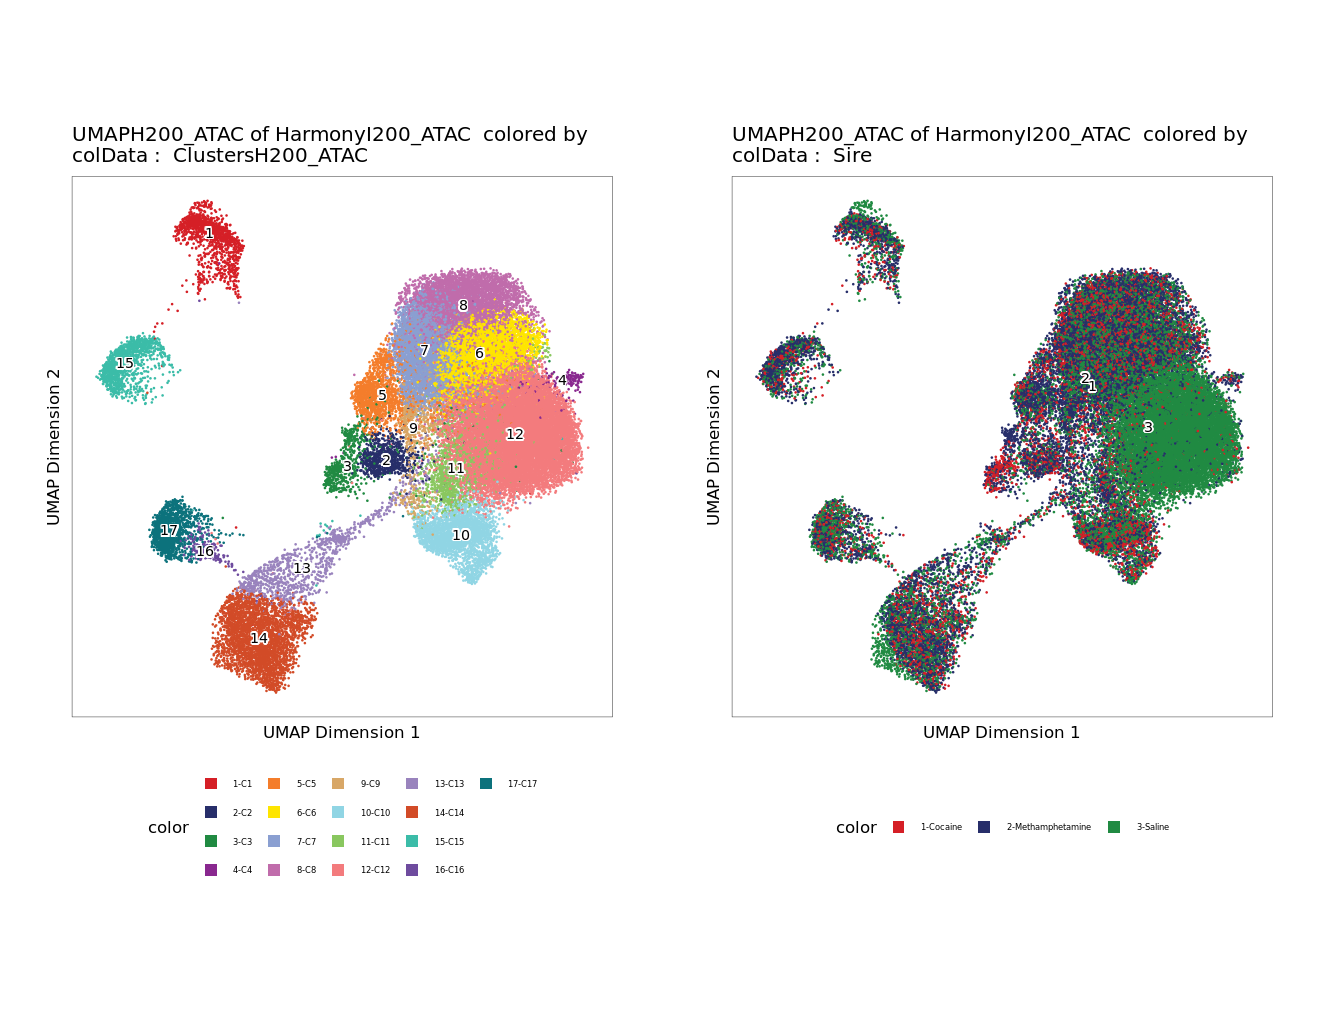

In [11]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200_ATAC", embedding = "UMAPH200_ATAC")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sire", embedding = "UMAPH200_ATAC")
                    
ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-1868824408ac-Date-2022-11-08_Time-13-39-33.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-1868824408ac-Date-2022-11-08_Time-13-39-33.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-18688655a84bd-Date-2022-11-08_Time-13-39-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-18688655a84bd-Date-2022-11-08_Time-13-39-45.log



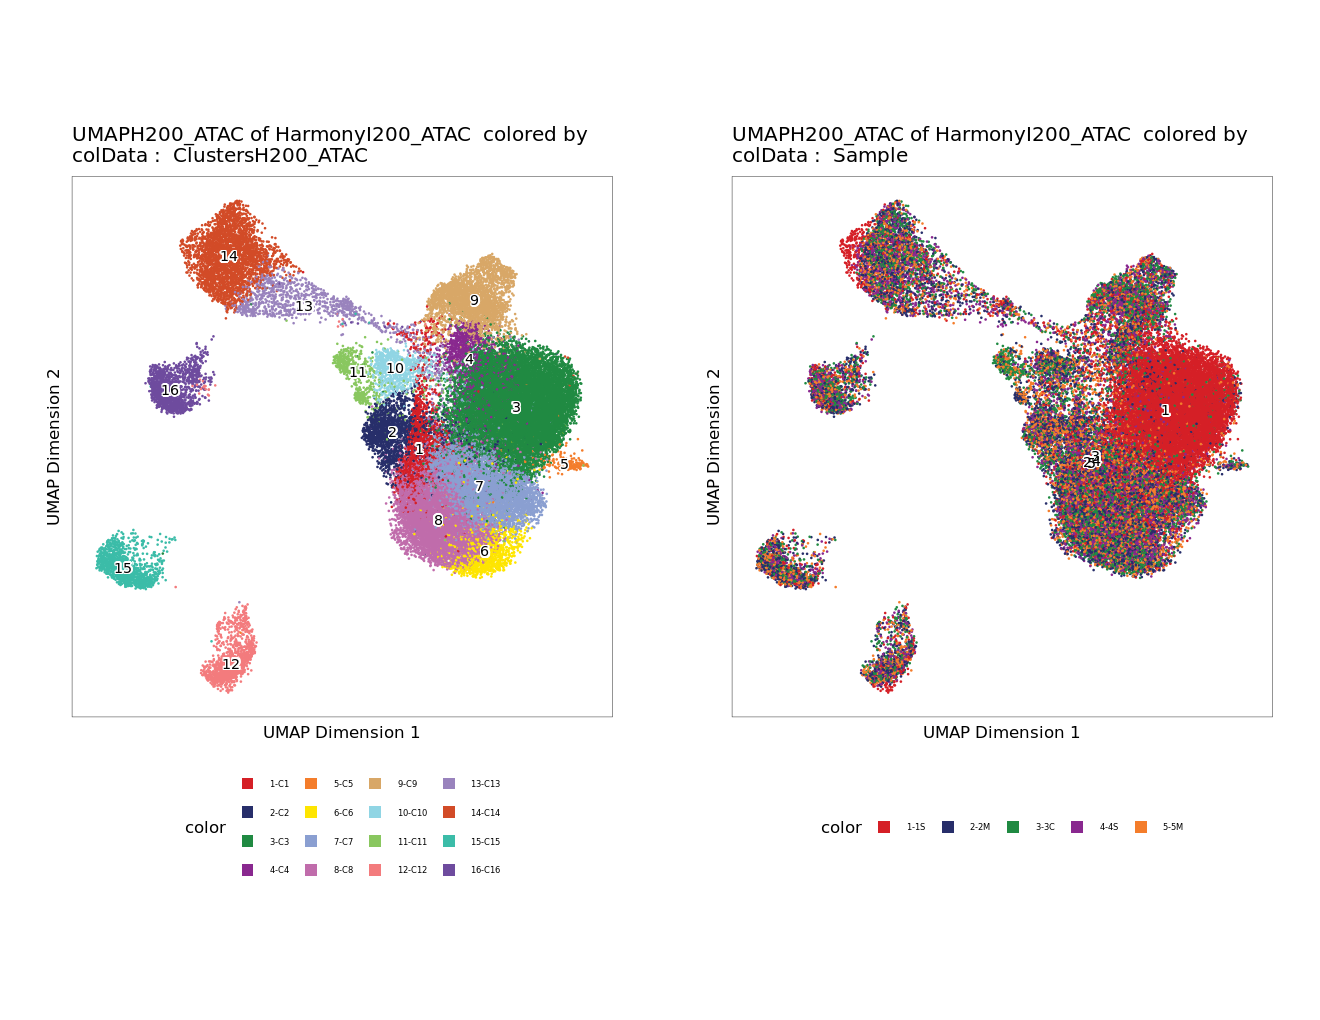

In [30]:
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200_ATAC", embedding = "UMAPH200_ATAC")

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Sample", embedding = "UMAPH200_ATAC")
                    
ggAlignPlots(p1, p3, type = "h")

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58440f7e377-Date-2022-11-11_Time-20-09-05.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58440f7e377-Date-2022-11-11_Time-20-09-05.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58449d16d72-Date-2022-11-11_Time-20-09-07.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58449d16d72-Date-2022-11-11_Time-20-09-07.log

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58450831663-Date-2022-11-11_Time-20-09-15.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58450831663-Date-2022-11-11_Time-20

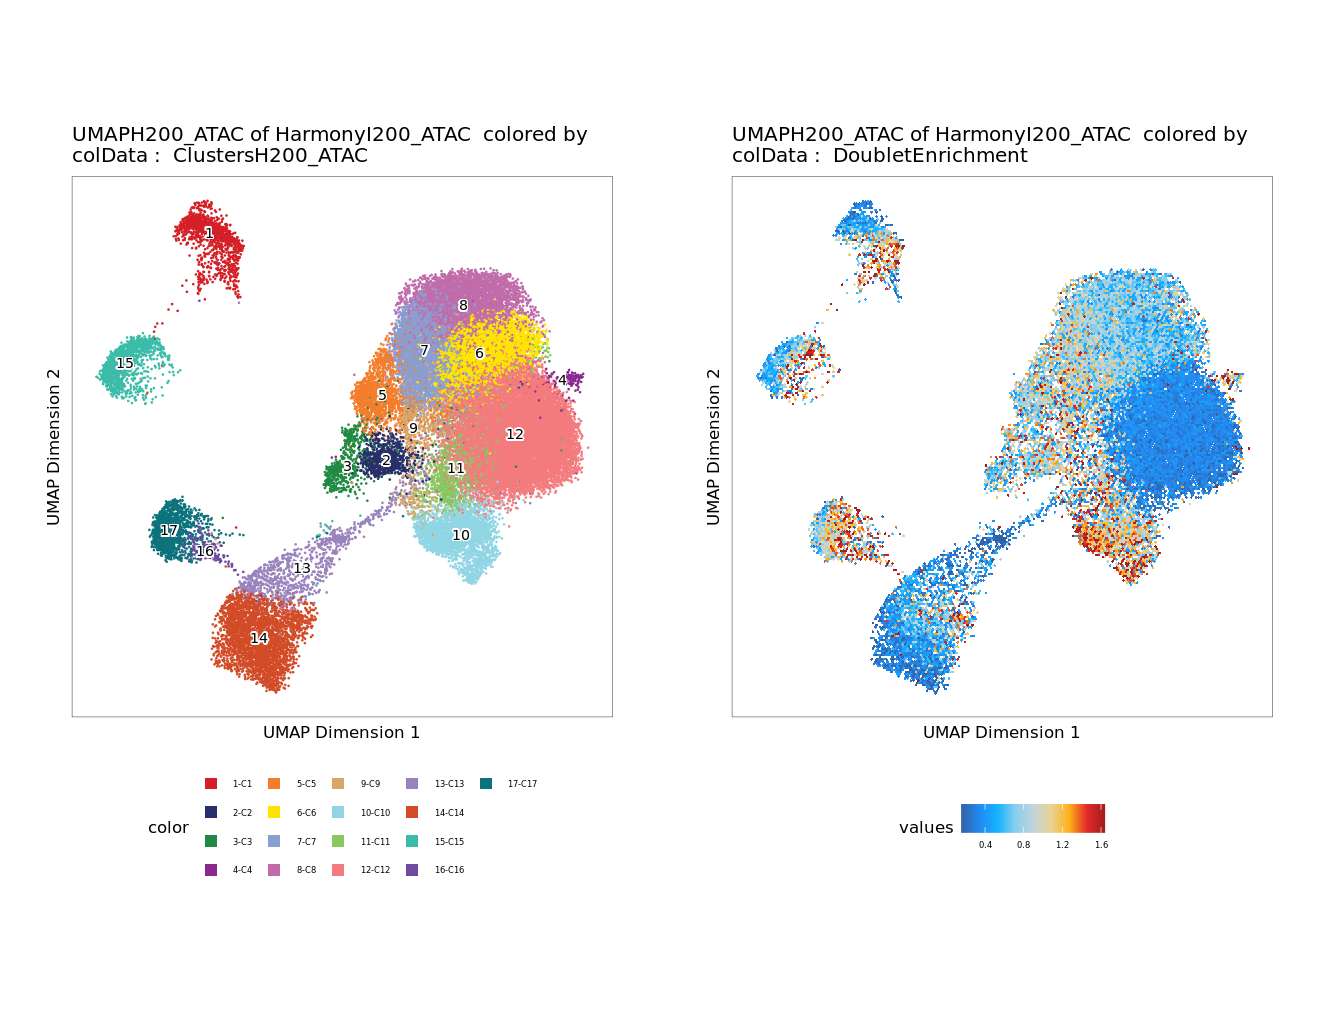

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b5845b822c75-Date-2022-11-11_Time-20-09-23.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b5845b822c75-Date-2022-11-11_Time-20-09-23.log



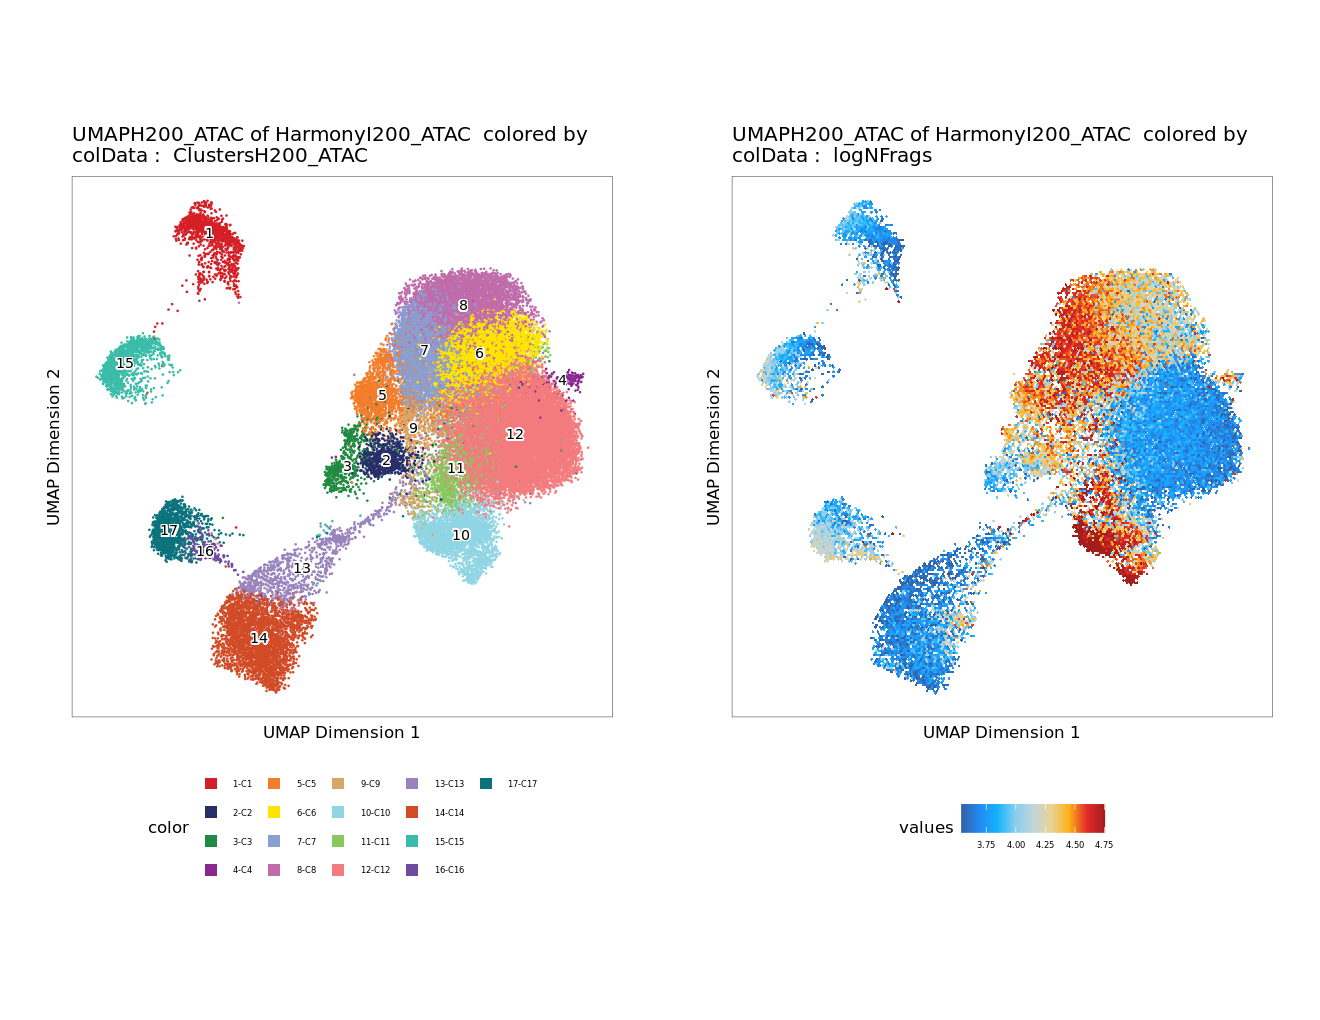

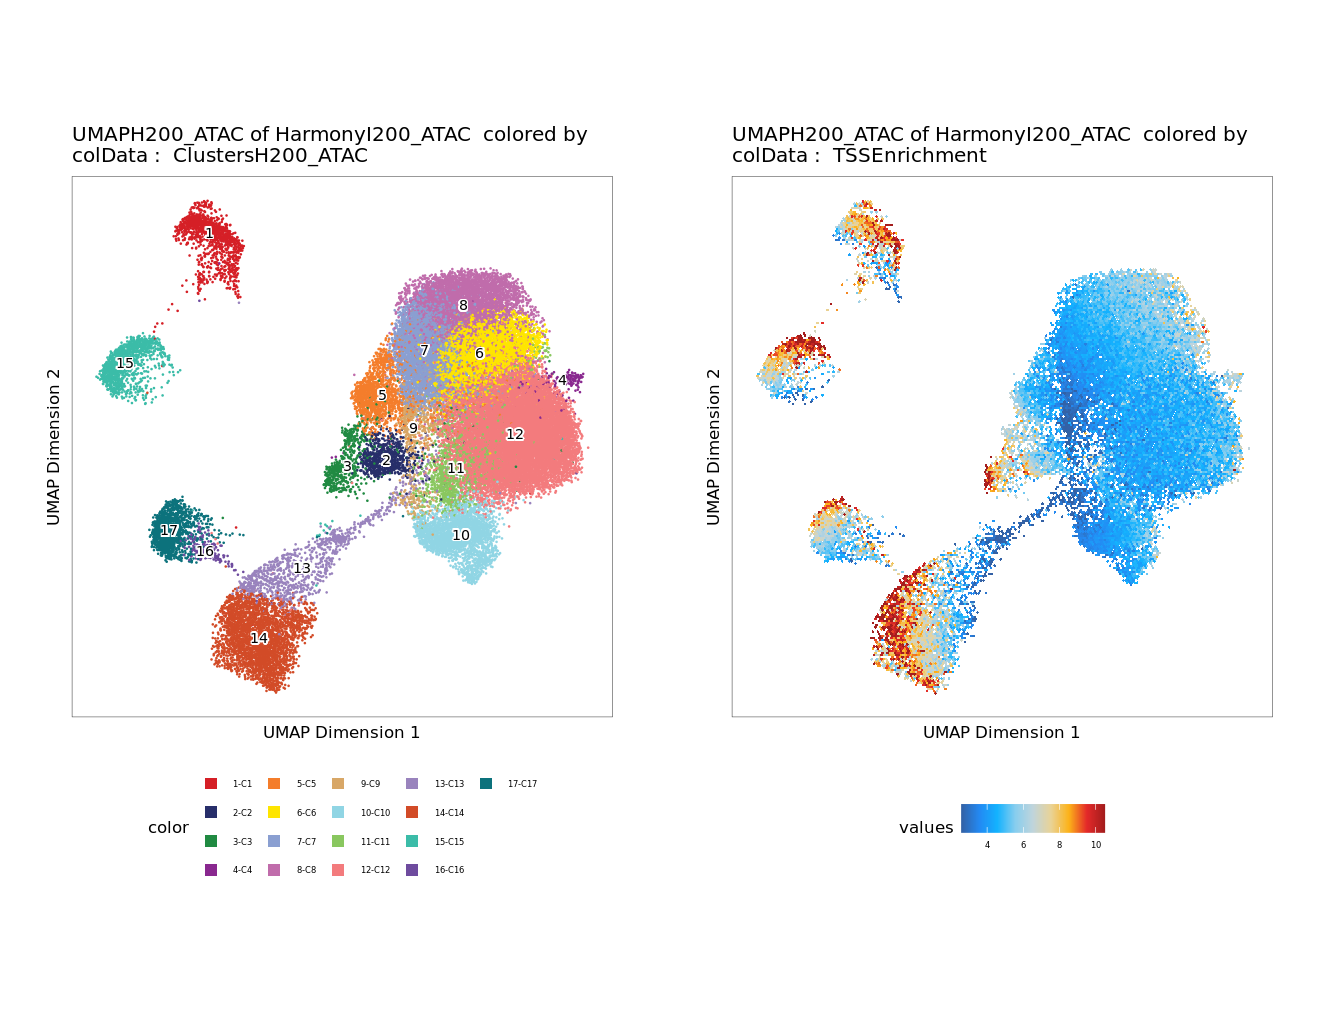

In [12]:
## make UMAP plots of
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "ClustersH200_ATAC", embedding = "UMAPH200_ATAC")

p2 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "DoubletEnrichment", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p2, type = "h")

proj$logNFrags = log10(proj$nFrags)

p3 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "logNFrags", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p3, type = "h")

p4 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "TSSEnrichment", embedding = "UMAPH200_ATAC")

ggAlignPlots(p1, p4, type = "h")

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b5844db86458-Date-2022-11-11_Time-20-15-45.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:15:47 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b5844db86458-Date-2022-11-11_Time-20-15-45.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(

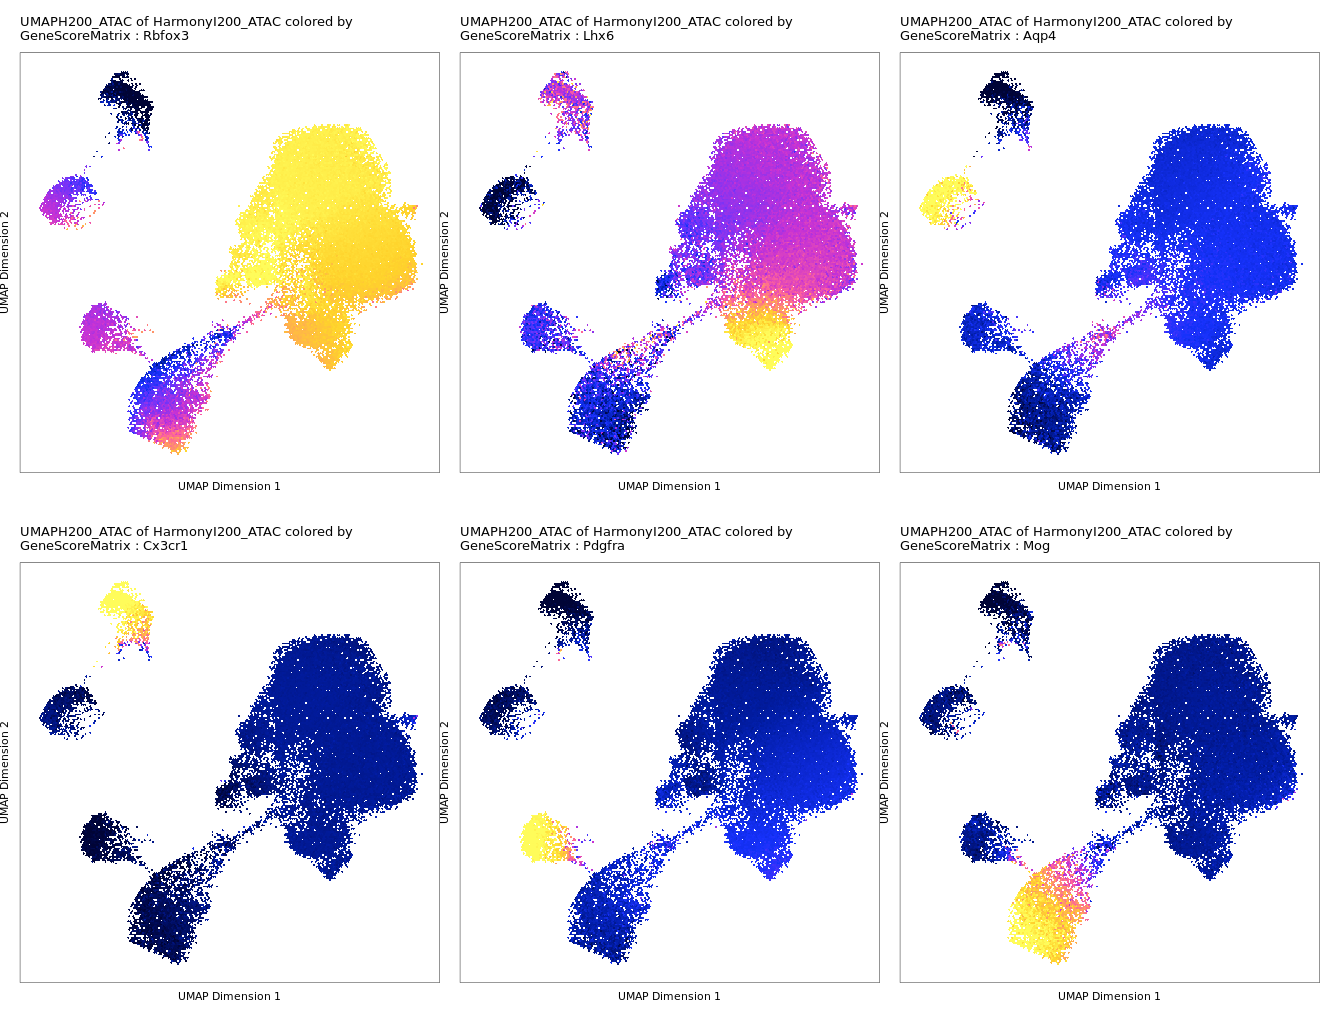

In [13]:
## Neuron vs. Glia markers
markerGenes1  <- c('Rbfox3', # Neuron
                   'Lhx6', #Interneuron
                   'Aqp4', # Astrocyte
                   'Cx3cr1', # Microglia
                   'Pdgfra', #OPC
                   'Mog' # Oligo
                  )

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p))

In [38]:
getFeatures(proj) %>% sort() %>% grep('Rbfox|Cx3', ., value = T)

[1] "Cx3cl1" "Rbfox1" "Rbfox2"

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b5845566fae4-Date-2022-11-11_Time-20-21-47.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:21:48 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b5845566fae4-Date-2022-11-11_Time-20-21-47.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<sc

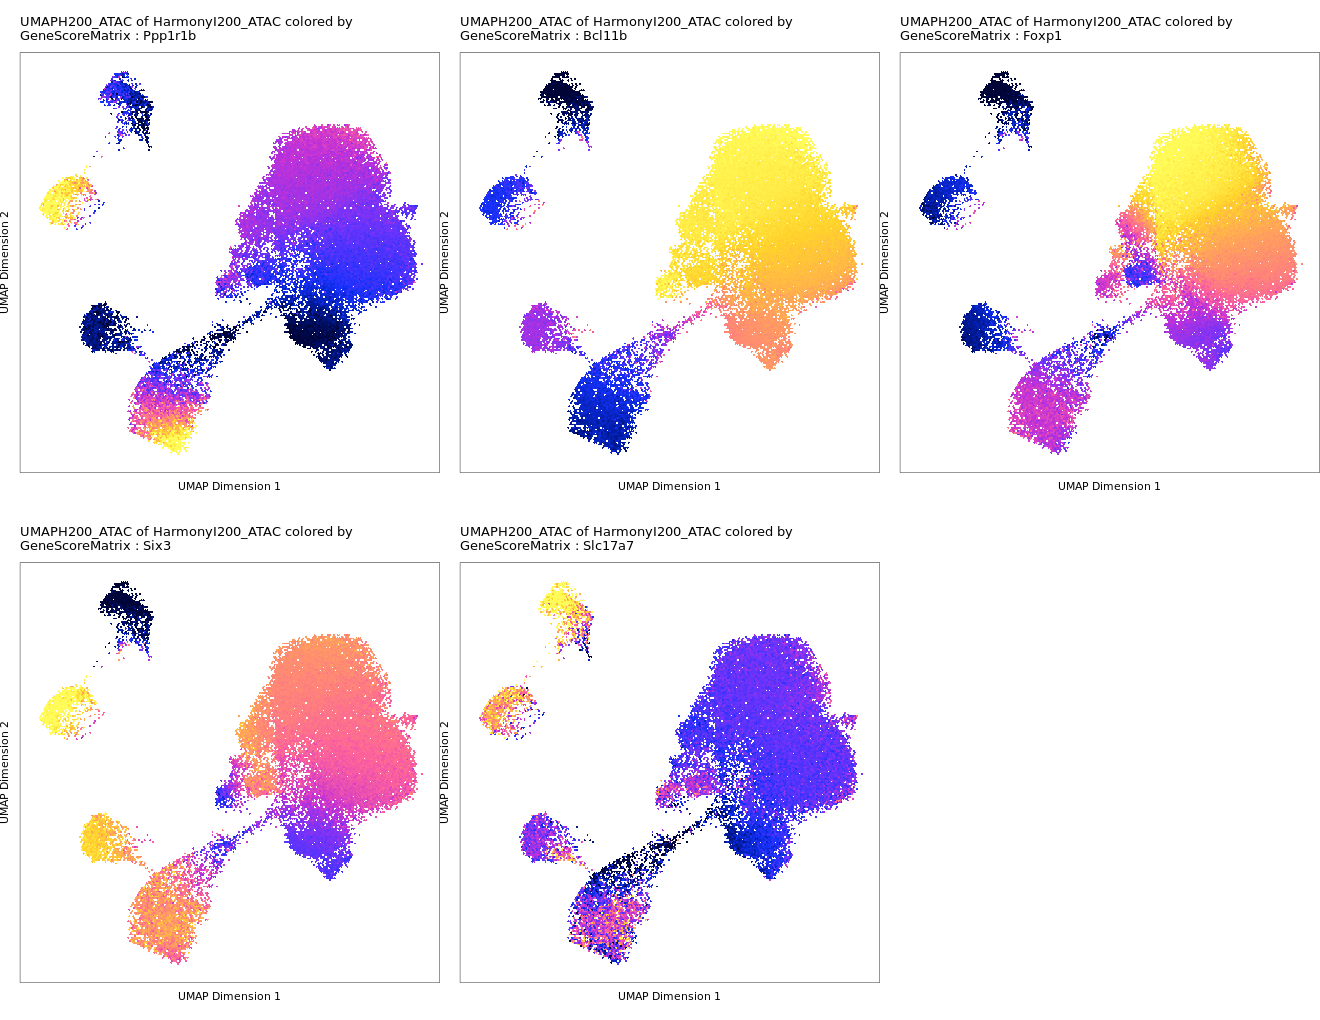

In [16]:
# Broad MSN marker, mouse 2010900C02Rik == human KIAA1211L
# MSN markers, Ppp1r1b = DARPP-32, Bcl11b=Ctip2
markMSN3 = c('Ppp1r1b','Bcl11b','Foxp1','Six3','Slc17a7' )
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN3, embedding = "UMAPH200_ATAC")
p3 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p3))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58468058c0a-Date-2022-11-11_Time-20-24-13.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:24:15 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58468058c0a-Date-2022-11-11_Time-20-24-13.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(

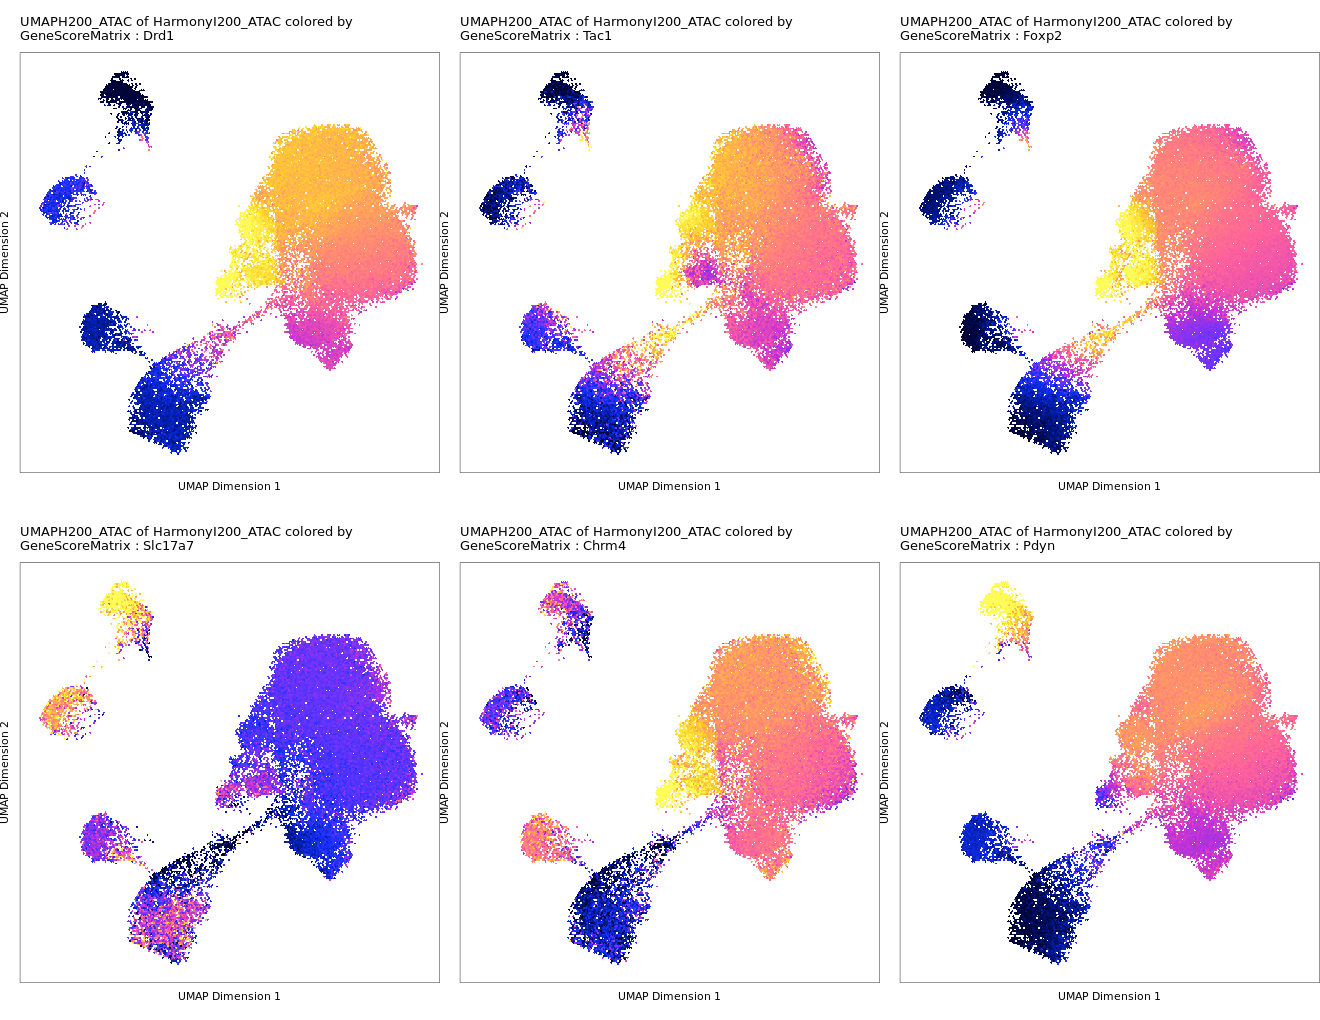

In [17]:
markMSN1 = c('Drd1','Tac1','Foxp2','Slc17a7','Chrm4', 'Pdyn') # D1 markers

# D1 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN1, embedding = "UMAPH200_ATAC") # 
p1 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) +
    theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme( axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
           axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p1))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58443d41ea7-Date-2022-11-11_Time-20-27-32.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:27:33 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58443d41ea7-Date-2022-11-11_Time-20-27-32.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(

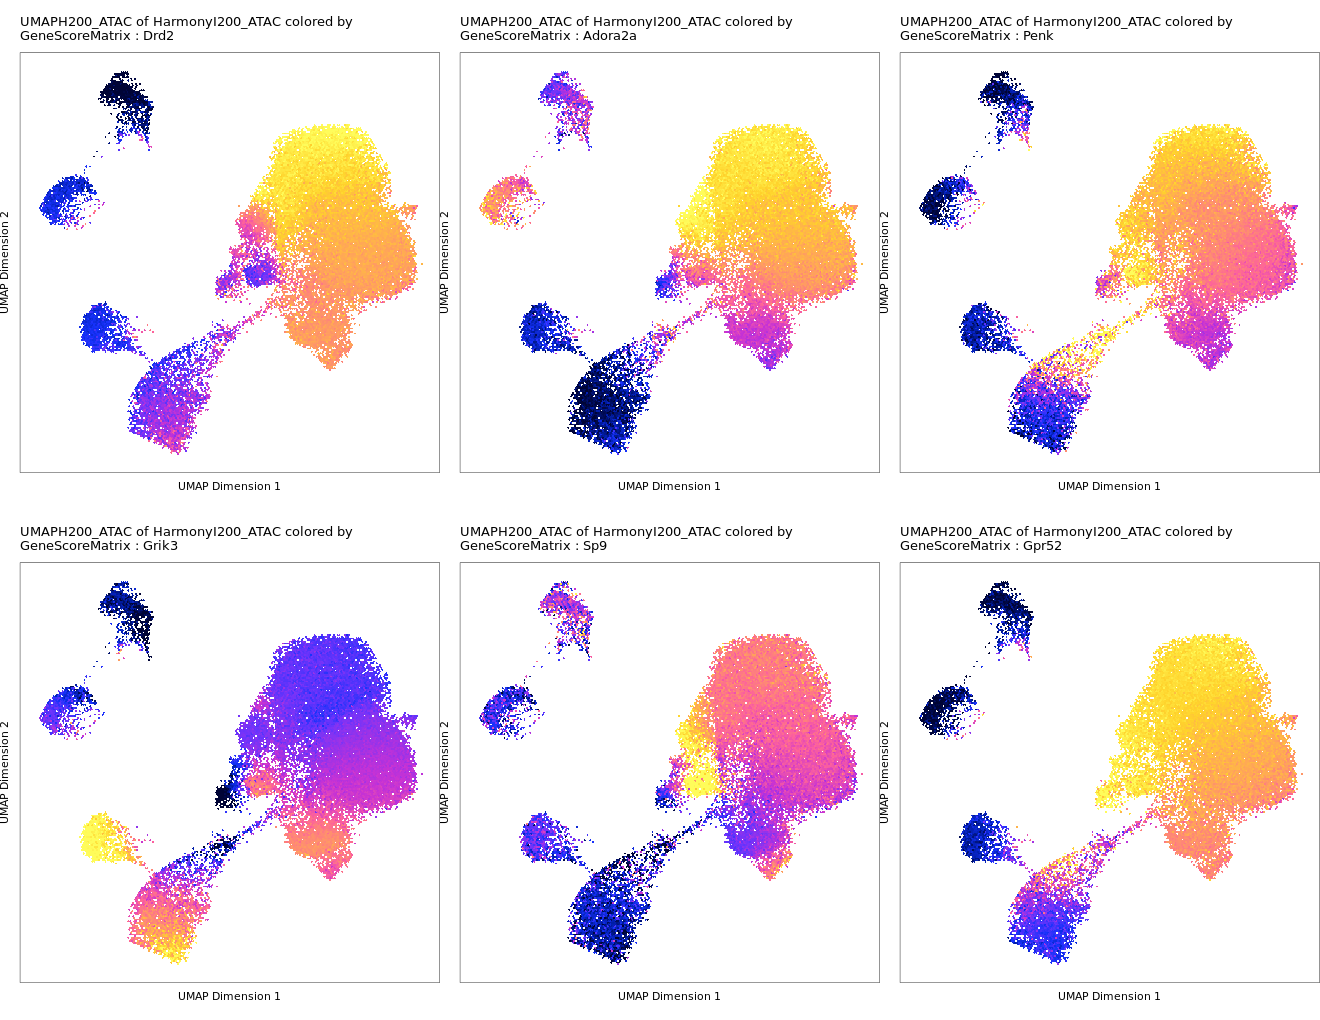

In [18]:
markMSN2 = c('Drd2','Adora2a','Penk', 'Grik3', 'Sp9', 'Gpr52')# D2 markers

# D2 MSN
p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markMSN2, embedding = "UMAPH200_ATAC")
p2 <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(ncol = 3),p2))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58439d982f8-Date-2022-11-11_Time-20-41-39.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:41:40 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58439d982f8-Date-2022-11-11_Time-20-41-39.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

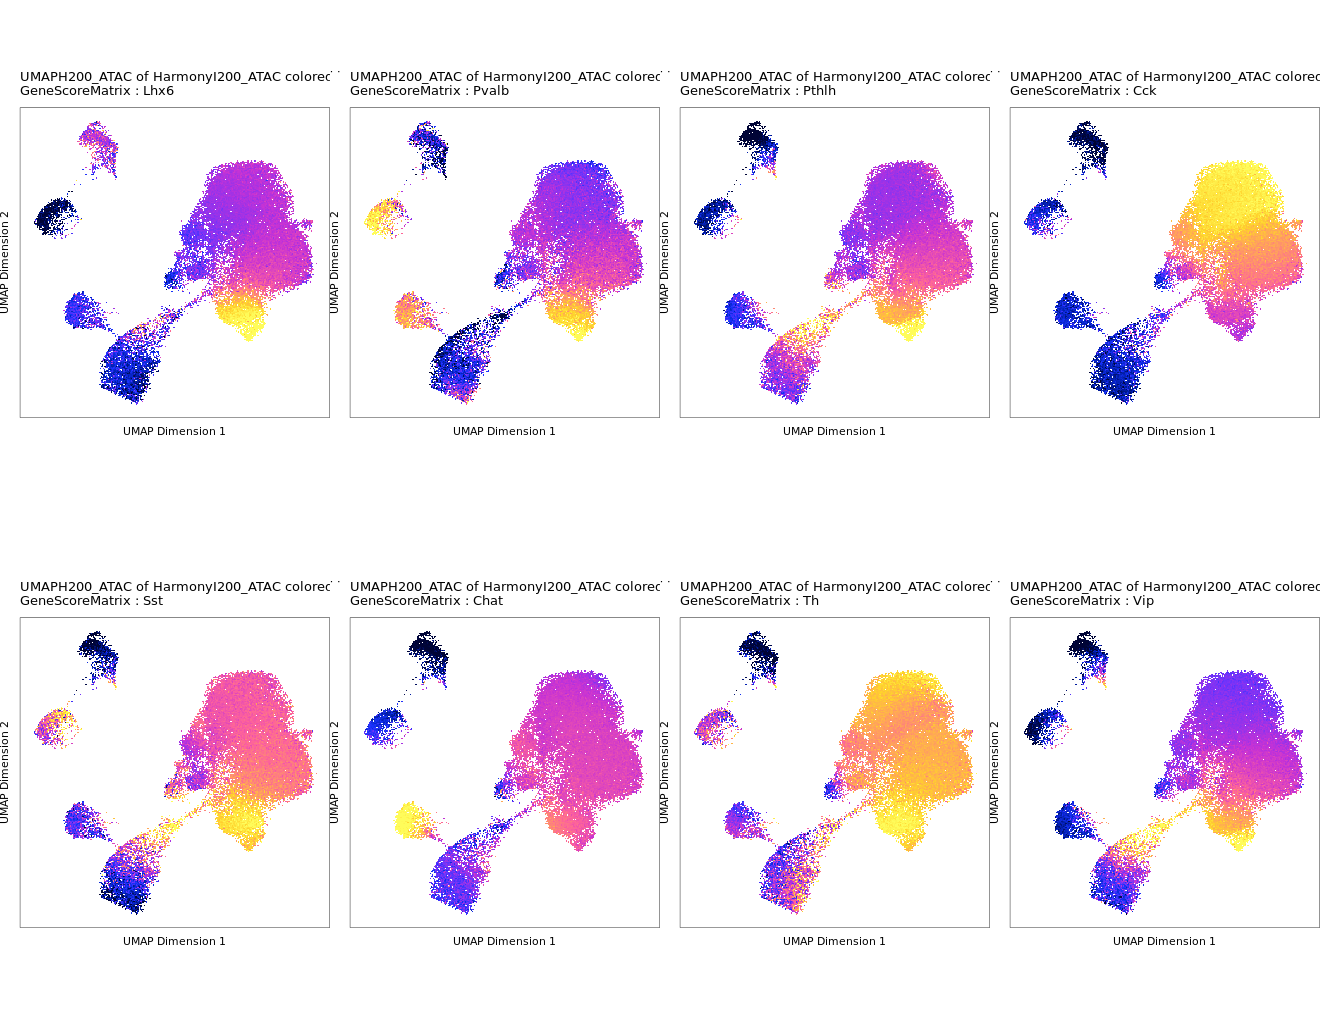

In [19]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb",'Pthlh','Cck', 'Sst', 'Chat','Th', 'Vip') # Interneuron markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix",
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b58450cb46bc-Date-2022-11-11_Time-20-47-16.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 20:47:17 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b58450cb46bc-Date-2022-11-11_Time-20-47-16.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

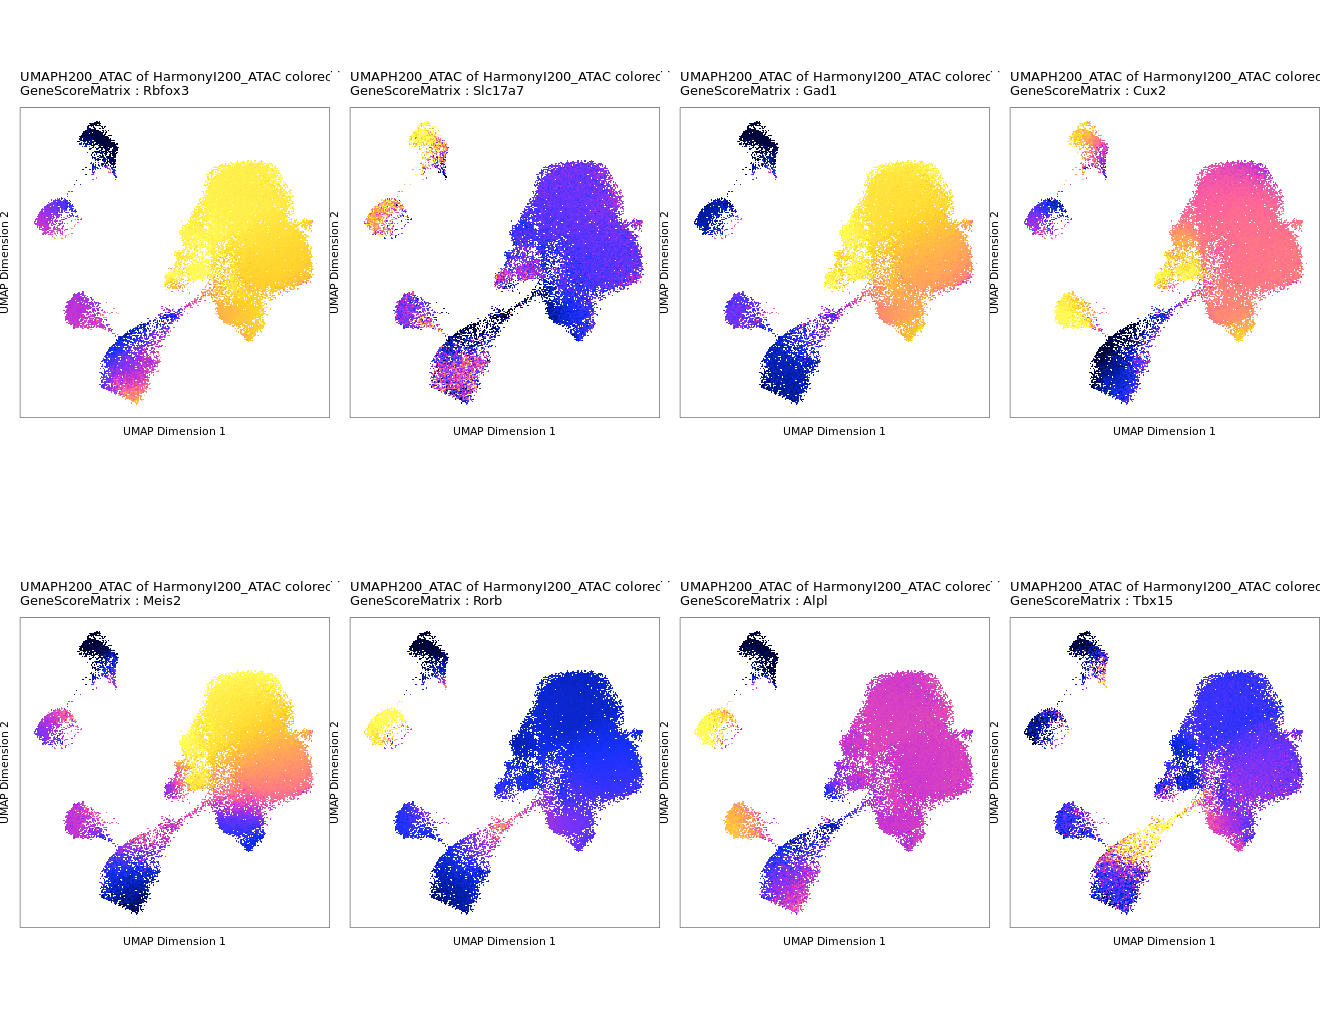

In [20]:
## plot Excitatory neuron markers for major class and upper layers
markerGenes1  <- c(
'Rbfox3', 'Slc17a7', 'Gad1', # Main classes
'Cux2', 'Meis2', "Rorb", # L3/ L4 IT
"Alpl", 'Tbx15') # L4/5)

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow =2),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b5847d289704-Date-2022-11-11_Time-21-22-17.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 21:22:19 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b5847d289704-Date-2022-11-11_Time-21-22-17.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

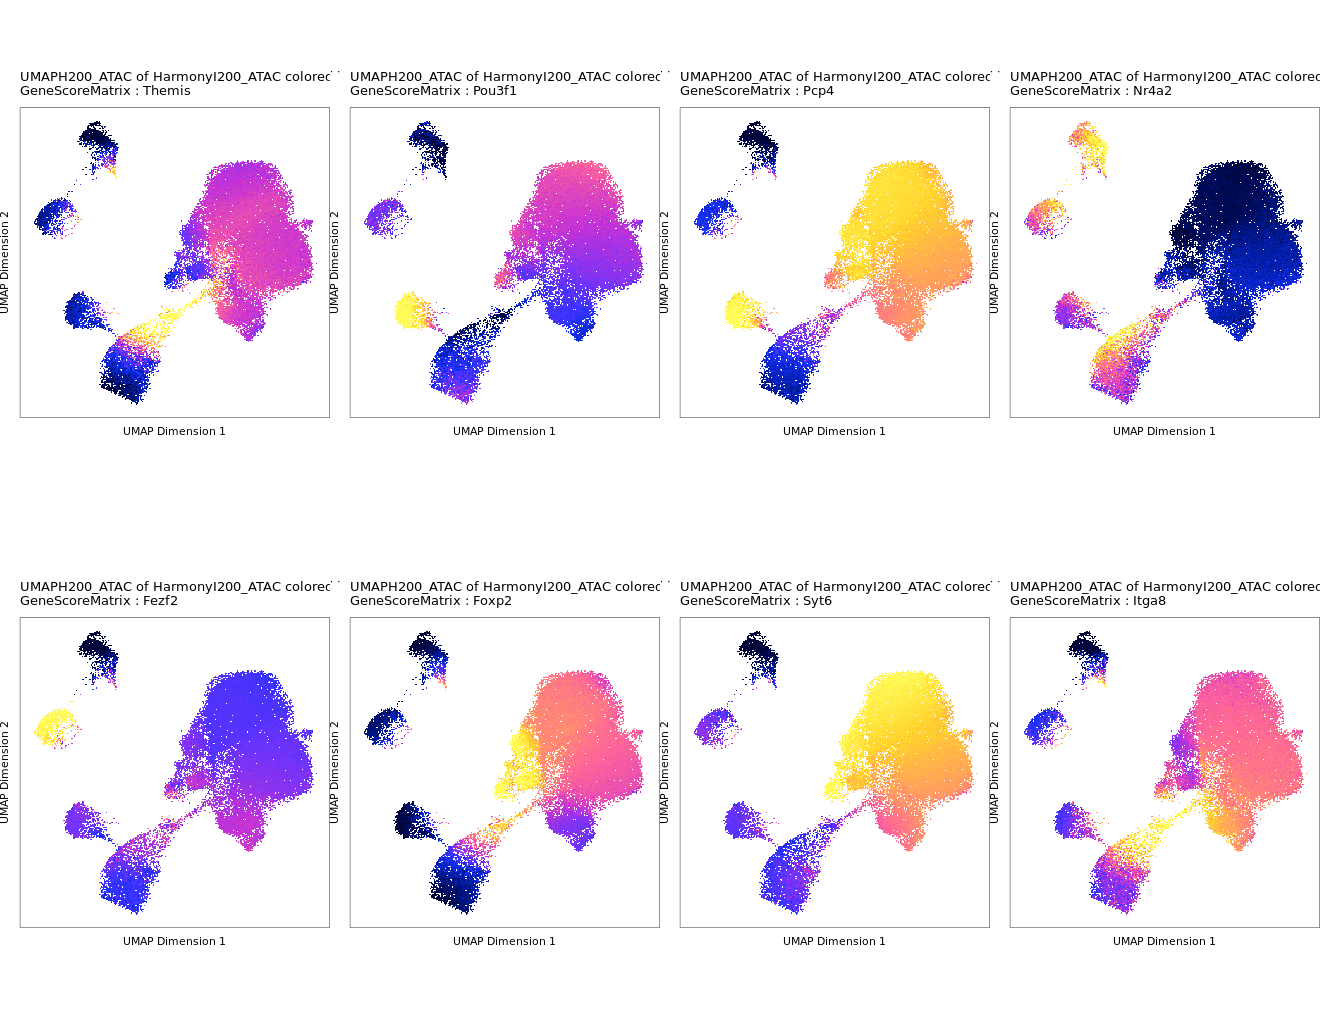

In [21]:
## plot Excitatory neuron markers for deeper layers
markerGenes1  <- c(
'Themis', # Car3 and L6 IT
'Pou3f1', 'Pcp4', 'Nr4a2', # L5
'Fezf2', 'Foxp2',# NP and L6, L5 ET
'Syt6',  'Itga8' #L6
)

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

Getting ImputeWeights

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-b584114c0b2c-Date-2022-11-11_Time-21-25-08.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = GeneScoreMatrix

Getting Matrix Values...

2022-11-11 21:25:11 : 



Imputing Matrix

Using weights on disk

Using weights on disk

Plotting Embedding

1 
2 
3 
4 
5 
6 
7 
8 


ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-b584114c0b2c-Date-2022-11-11_Time-21-25-08.log

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”
Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `g

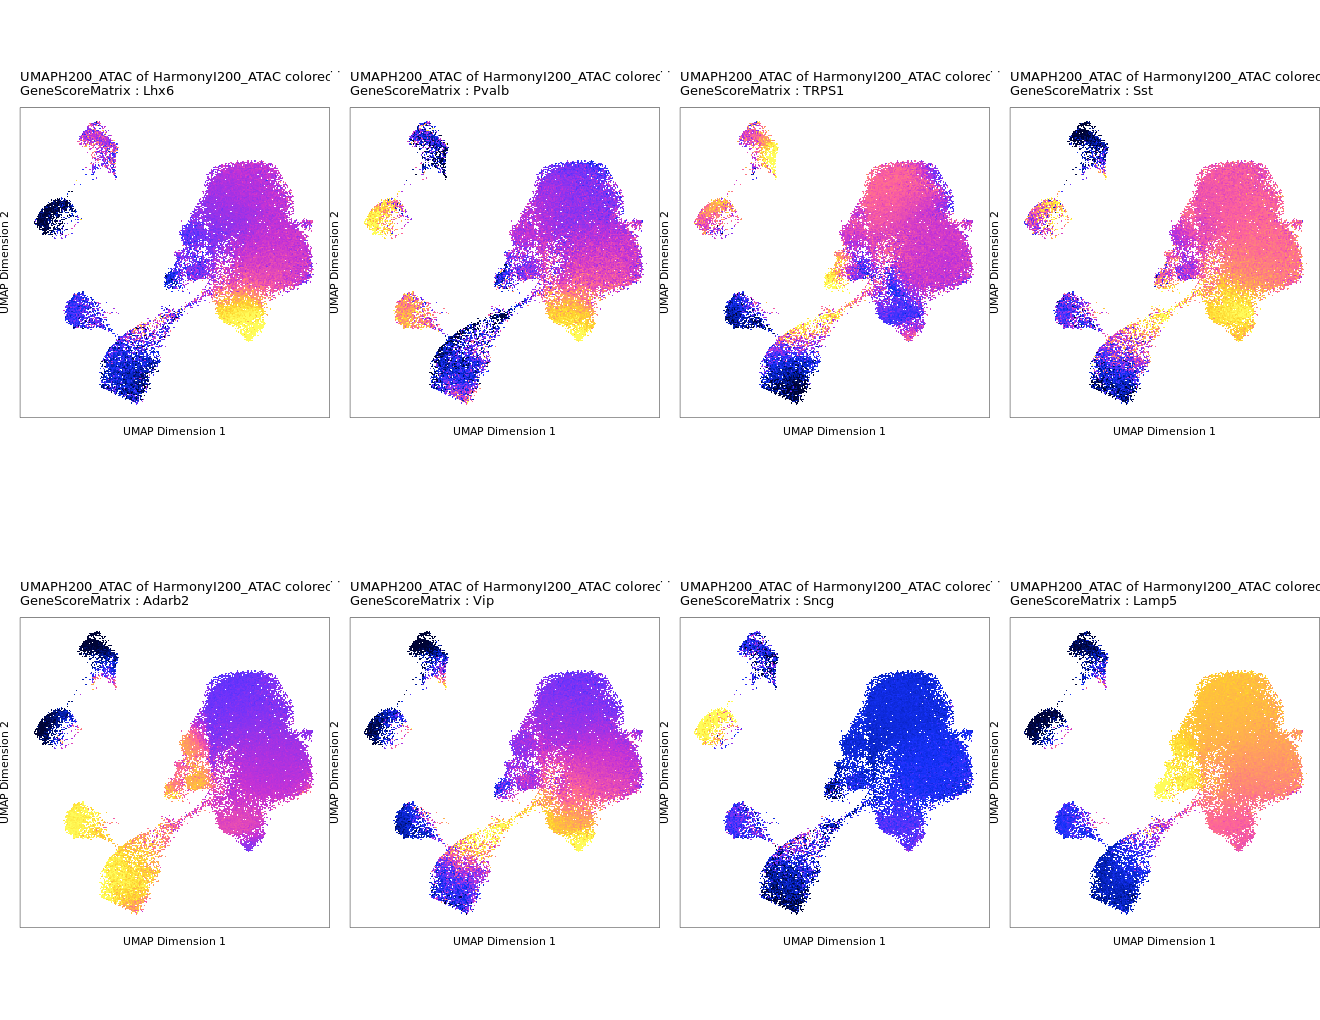

In [22]:
## plot more interneuron markers
markerGenes1  <- c('Lhx6', "Pvalb", 'TRPS1', 'Sst', # MGE markers
                    'Adarb2', 'Vip', 'Sncg', 'Lamp5') # CGE markers

p <- plotEmbedding( ArchRProj = proj, colorBy = "GeneScoreMatrix", 
                    name = markerGenes1, embedding = "UMAPH200_ATAC")
p <- lapply(p, function(x){
  x + guides(color = FALSE, fill = FALSE) + 
    theme_ArchR(baseSize = 6.5) + theme(plot.margin = unit(c(0, 0, 0, 0), "cm")) +
    theme(  axis.text.x=element_blank(),  axis.ticks.x=element_blank(), 
            axis.text.y=element_blank(),  axis.ticks.y=element_blank())
})
do.call(cowplot::plot_grid, c(list(nrow = 2),p))

# Relabel cluster and call peaks

In [5]:
############################################
# using marker gene scores, give cluster names
# NO EXC, replace w/ MSN
remapClust <- c(
  'C1'='MICROGLIA',
  'C2'='D1MSN',
  'C3'='D1MSN',
  'C4'='D2MSN',
  'C5'='D1MSN',
  'C6'='D2MSN',
  'C7'='D2MSN', 
  'C8'='D2MSN',
  'C9'='D2MSN', #not clear if belongs to d1 or d2
  'C10'='INTERNEURONS',
  'C11'='D2MSN',
  'C12'='D2MSN',
  'C13'='INTERNEURONS',#not sure what exactly the cell type is, might want to drop
  'C14'='OLIGO',
  'C15'='ASTRO',
  'C16'='Drop',#not sure what exactly the cell type is, might want to drop
  'C17'='OPC'
  
)

proj$Celltype1 <- mapLabels(proj$ClustersH200_ATAC, newLabels = remapClust, 
                            oldLabels = names(remapClust))
table(proj$Celltype1)


       ASTRO        D1MSN        D2MSN         Drop INTERNEURONS    MICROGLIA 
        1264         3299        29675          215         3807         1293 
       OLIGO          OPC 
        3172         1343 

ArchR logging to : ArchRLogs/ArchR-plotEmbedding-c6619001fbb-Date-2022-11-20_Time-23-05-49.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-c6619001fbb-Date-2022-11-20_Time-23-05-49.log



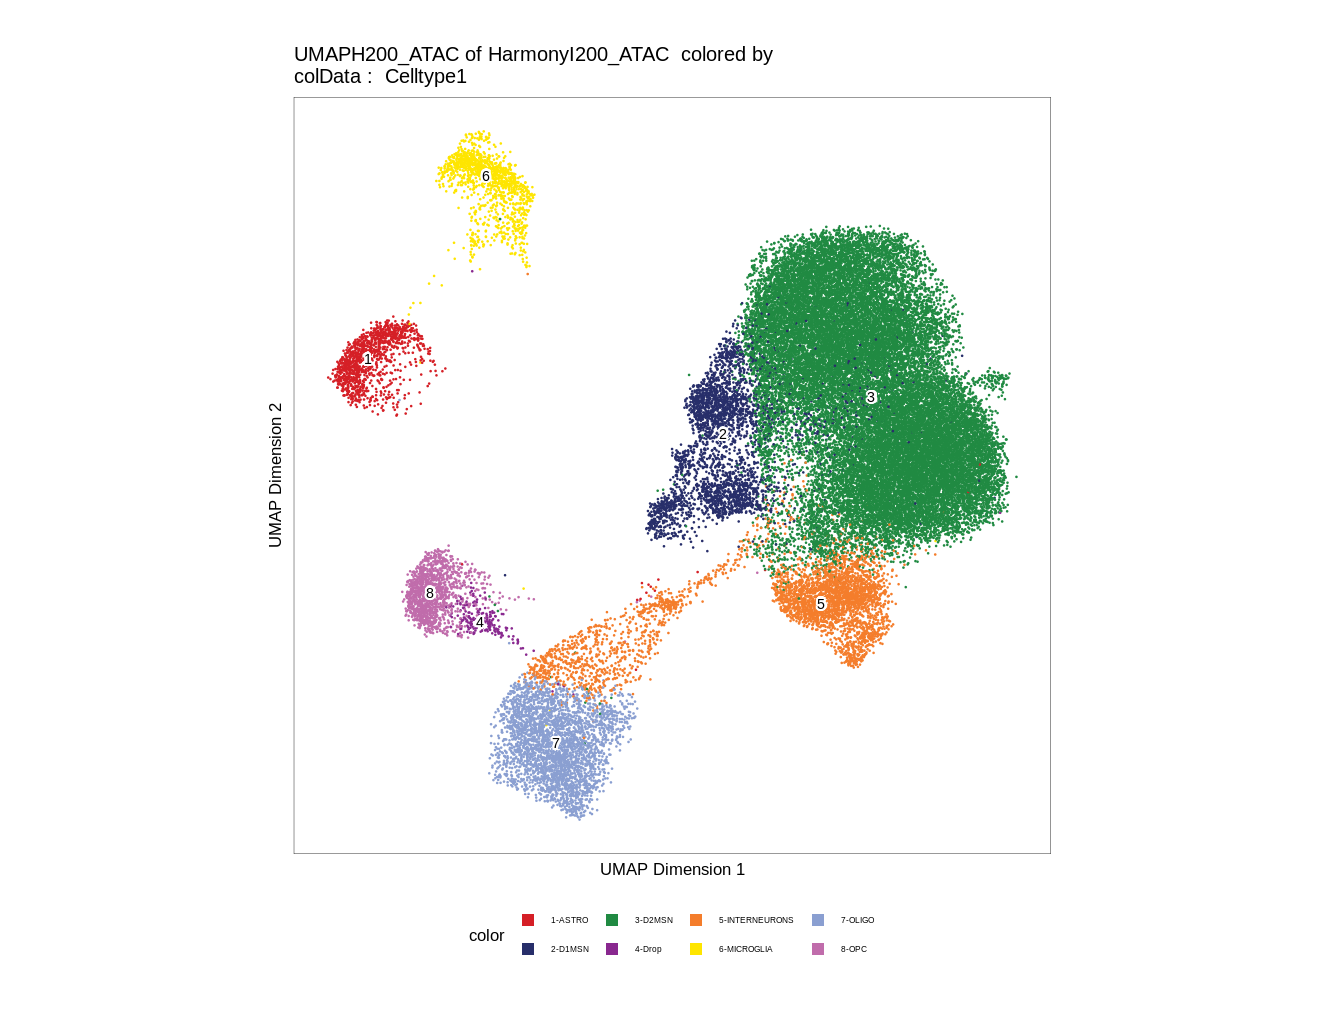

In [6]:
## make UMAP plots
p1 <- plotEmbedding(ArchRProj = proj, colorBy = "cellColData", 
                    name = "Celltype1", embedding = "UMAPH200_ATAC")

p1

In [7]:
# drop the drop clusters, pull out the neuron cell types
ARCHDIR2=file.path(PROJDIR,'Rat_Transgen_NAc_scATAC_neuron')
neuronType = c( 'D1MSN','D2MSN', 'INTERNEURONS')
idxSample <- BiocGenerics::which(proj$Celltype1 %in% neuronType )
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj, cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


       D1MSN        D2MSN INTERNEURONS 
        3299        29675         3807 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Pierce_transgen_rat_multiome/data/tidy_data/ArchRProjects/Rat_Transgen_NAc_scATAC_neuron

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 2): Embeddings

Copying Other Files (2 of 2): IterativeLSI200_ATAC

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /    

In [15]:
# drop the drop clusters, pull out the glia cell types
ARCHDIR2=file.path(PROJDIR,'ArchR_snATAC_DLPFC_glia')
idxSample <- BiocGenerics::which(proj$Celltype1 %ni% c(neuronType, 'Drop'))
table(proj$Celltype1[idxSample])
cellsSample <- proj$cellNames[idxSample]

proj2 = subsetArchRProject(
  ArchRProj = proj,
  cells = cellsSample,
  outputDirectory = ARCHDIR2, force = TRUE
)


    Astro      Endo Microglia     Oligo       OPC 
     7472      1276      3599      3028      2434 

Dropping ImputeWeights Since You Are Subsetting Cells! ImputeWeights is a cell-x-cell Matrix!

Copying ArchRProject to new outputDirectory : /projects/pfenninggroup/singleCell/Macaque_Multiome_DLPFC/data/tidy_data/ArchRProjects/ArchR_snATAC_DLPFC_glia

Copying Arrow Files...

Getting ImputeWeights

No imputeWeights found, returning NULL

Copying Other Files...

Copying Other Files (1 of 3): Embeddings

Copying Other Files (2 of 3): IterativeLSI150_ATAC

Copying Other Files (3 of 3): IterativeLSI200_ATAC

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
   

In [16]:
proj = saveArchRProject(ArchRProj = proj)

Saving ArchRProject...

Loading ArchRProject...

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
         

In [4]:
library()